## Chapter 5: NumPy Guidebook
***

NumPy is a package for scientific computing and data analysis.

NumPy provides a multi-dimensional array data structure, `ndarray`, which is a fast, flexible container for large data sets in Python.

In an ndarray, all the elements must be the same type.
Every ndarray has a `shape`, which is a tuple indicating the size of each dimension, and a `dtype`, describing the data type of the elements in the array.

In [1]:
import numpy as np
a = np.arange(15).reshape(3, 5)
print(a)

print(a.shape)

print(a.ndim)

print(a.dtype.name)

print(a.size)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
(3, 5)
2
int64
15


### §5.1 Array Creation

The most common way to create an ndarray is through a regular Python list or tuple using `array` function:

In [1]:
import numpy as np
data = [1,2,3]
a = np.array(data)
print(a)
a.dtype

[1 2 3]


dtype('int64')

A frequent error consists in calling array with multiple arguments, rather than providing a single sequence as an argument.

In [2]:
a = np.array(1,2,3,4)

ValueError: only 2 non-keyword arguments accepted

In [3]:
b = np.array([1,2,3,4])
print(b.dtype)

int64


> Be careful that the input argument is a `list`.

The nested level decides the number of dimensions. For example, a sequence (can be list, tuple, etc.) of sequences is a two-dimensional array. 

In [4]:
arr = np.array([(2.1, 4, 7.0), (-5, 72, 4.3)])
arr

array([[ 2.1,  4. ,  7. ],
       [-5. , 72. ,  4.3]])

In [6]:
arr.shape

(2, 3)

While creating an array, `np.array` will try to choose a proper data type for you.

In [7]:
arr.dtype

dtype('float64')

There are some other functions for creating new arrays:

In [8]:
np.zeros( (5,3) )

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [9]:
np.ones( (2, 4) )

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [10]:
np.empty( (5, 6) ) # with garbage values

array([[-1.28822975e-231, -1.28822975e-231,  8.39911598e-323,
         0.00000000e+000,  2.12199579e-314,  5.02034658e+175],
       [ 4.08762060e-033,  1.59956647e+160,  6.86860597e+169,
         2.94826792e+179,  5.01163119e+217,  5.49419094e-143],
       [ 9.80058441e+252,  1.30304358e-142,  2.14027814e+161,
         3.99912029e+151,  1.92518780e+195,  4.96216861e+180],
       [ 8.37174974e-144,  1.95110983e+160,  1.10876657e-047,
         2.32212862e-056,  2.31904204e-056,  5.28555805e+180],
       [ 5.27606290e-091,  6.05674488e-067,  1.30439750e-076,
         4.29598320e-096,  9.08366791e+223,  5.81186265e+294]])

In [10]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [11]:
np.eye(4) # identity

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [12]:
np.linspace(0, 18, 10)  # 10 numbers from 0 to 18

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.])

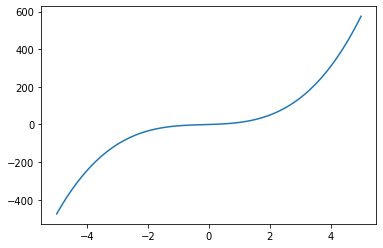

In [13]:
import matplotlib.pyplot as plt

x_ = np.linspace(-5, 5, 100)
y_ = 4 * (x_**3) + 2 * (x_**2) + 5 * x_
plt.plot(x_, y_)
plt.show()

You can specify the data type of the created array by setting the `dtype` argument:

In [14]:
np.array([1,2,3], dtype=np.float64)

array([1., 2., 3.])

> Note  
You can explicitly convert an array from one dtype to another using `astype`.  
e.g. arr.astype(np.int32)

When you print an array, NumPy displays it in a similar way to nested lists, but with the following layout:

- the last axis is printed from left to right,

- the second-to-last is printed from top to bottom,

- the rest are also printed from top to bottom, with each slice separated from the next by an empty line.

One-dimensional arrays are then printed as rows, bidimensionals as matrices and tridimensionals as lists of matrices.

In [15]:
a = np.arange(6)  # 1d array
print(a)

[0 1 2 3 4 5]


In [16]:
b = np.arange(12).reshape(4,3) # 2d array
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [11]:
c = np.arange(24).reshape(2,3,4) # 3d array
print(c)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [16]:
c[:,0,1]

array([ 1, 13])

### §5.2 Array Attributes

`.ndim`  
the number of dimensions (rank)

`.shape`  
the dimensions of the array represented as a tuple

`.size`  
the number of items in the array, which is also the product of the numbers in `.shape`

`.dtype`  
the data type of the items in the array

`.itemsize`  
the size of bytes of each item in the array


In [18]:
arr = np.array( [ [1, 2, 3, 4, 5],
                  [9, 7, 5, 3, 1],
                  [-2, 4, -6, 8, -10]] )
print( "Dimension:", arr.ndim )
print( "Shape:    ", arr.shape )
print( "Size:     ", arr.size )
print( "Type:     ", arr.dtype )
print( "Item size:", arr.itemsize )

Dimension: 2
Shape:     (3, 5)
Size:      15
Type:      int64
Item size: 8


### §5.3 Basic Operations
Any arithmetic operations between equal-size arrays applies the operation elementwise:


In [19]:
arr = np.array([[1, 3, 5], [2, 4, 6]])
arr

array([[1, 3, 5],
       [2, 4, 6]])

In [20]:
arr + arr

array([[ 2,  6, 10],
       [ 4,  8, 12]])

In [21]:
arr * arr

array([[ 1,  9, 25],
       [ 4, 16, 36]])

When doing arithmetic operations with scalars, the operation will take effects on each item:

In [22]:
arr / 2

array([[0.5, 1.5, 2.5],
       [1. , 2. , 3. ]])

In [23]:
arr ** 0.5

array([[1.        , 1.73205081, 2.23606798],
       [1.41421356, 2.        , 2.44948974]])

In [24]:
arr < 5

array([[ True,  True, False],
       [ True,  True, False]])

Unlike in many matrix languages, the product operator * operates elementwise in NumPy arrays. The matrix product can be performed using the @ operator (in python >=3.5) or the dot function or method:

In [25]:
X = np.array( [ [2, 3],   # [ [a,b],
                [0, 1] ]) #   [c,d] ]
Y = np.array( [ [1, 2],   # [ [e,f],
                [3, 4] ]) #   [g,h] ]
print(X @ Y)
print(X.dot(Y))

#[ [a*e+b*g, a*f+b*h]
#  [c*e+d*g, c*f+d*h] ]

[[11 16]
 [ 3  4]]
[[11 16]
 [ 3  4]]


Assignment operations, such as `+=`, `*=`, will modify the existing array, rather than create a new one.

In [26]:
arr = np.zeros( (3, 2) )
arr += 5
arr

array([[5., 5.],
       [5., 5.],
       [5., 5.]])

### §5.4 Basic Indexing and Slicing

Indexing and slicing on a one-dimensional array is the same as on a list.  
For multi-dimensional arryas, these indices are given in a tuple separated by commas,  
i.e. `arr[(1st dimension), (2nd dimension), (3rd dimension), ...]`

In [18]:
arr = np.arange(9).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [28]:
arr[1,2] # the element on the 2nd row, 3rd column

5

In [29]:
arr[0:3, 1] # row from 0 to 3 in the 2nd column

array([1, 4, 7])

In [30]:
arr[:, 1] # same as above

array([1, 4, 7])

In [31]:
arr[1:3, :] # 2nd and 3rd (1:3) rows of all collumns

array([[3, 4, 5],
       [6, 7, 8]])

>  Try to predict the following slicing result on a 3*3 array  
`arr[:2, 1:]`
>  
`arr[2]`
`arr[2, :]`
`arr[2:, :]`
>  
`arr[:, :2]`
>  
`arr[1, :2]`
`arr[1:2, :2]`

In [19]:
arr[:2, 1:]

array([[1, 2],
       [4, 5]])

### Array index tricks

NumPy offers more indexing facilities than regular Python sequences. In addition to indexing by integers and slices, as we saw before, arrays can be indexed by arrays of integers and arrays of booleans.

In [32]:
a = np.arange(12)**2 # the first 12 square numbers
i = np.array([1, 1, 3, 8, 5]) # an array of indices
print(a)

a[i]

[  0   1   4   9  16  25  36  49  64  81 100 121]


array([ 1,  1,  9, 64, 25])

In [33]:
j = np.array([[3, 4], [9, 7]]) # a bidimensional array of indices
a[j]

array([[ 9, 16],
       [81, 49]])

In [30]:
palette = np.array([[0, 0, 0],         # black
                    [255, 0, 0],       # red
                    [0, 255, 0],       # green
                    [0, 0, 255],       # blue
                    [255, 255, 255]])  # white

image = np.array([[0, 1, 2, 0],        
                  [0, 3, 4, 0]])
# each value corresponds to a color in the palette

palette[image] # the (2, 4, 3) color image

palette[image]

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

The most natural way one can think of for boolean indexing is to use boolean arrays that have the same shape as the original array:

In [35]:
a = np.arange(12).reshape(3,4)
b = a > 4
b # b is a boolean with a's shape

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]])

In [36]:
a[b] # 1d array with the selected elements

array([ 5,  6,  7,  8,  9, 10, 11])

This property can be very useful in assignments:

In [37]:
a[b] = 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

### §5.5 Funtions and Methods
`.random.random`  
Return random floats in the half-open interval [0.0, 1.0).

In [35]:
np.random.random(5)

array([0.31157716, 0.91795696, 0.11113743, 0.79960449, 0.19946863])

`.random.normal`  
Draw random samples from a normal (Gaussian) distribution.

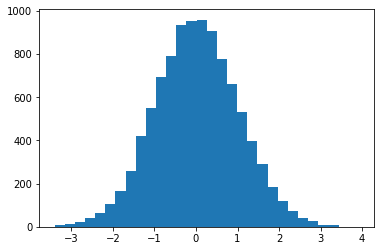

In [38]:
import matplotlib.pyplot as plt
values= np.random.normal(size=10000)
plt.hist(values, 30)
plt.show()

`.random.permutation`  
Randomly permute a sequence, or return a permuted range.

In [40]:
np.random.permutation(10)

array([8, 2, 7, 9, 5, 4, 6, 3, 1, 0])

In [41]:
np.random.permutation([3, 5, 2, 10, 0])

array([ 0,  5,  2,  3, 10])

`.floor`  
Return the floor of the input, element-wise.

In [42]:
arr = np.array([-2.5, -1.7, -2.0, 0.2, 1.3])
np.floor(arr)

array([-3., -2., -2.,  0.,  1.])

`.vstack`  
Stack arrays in sequence vertically (row wise).

In [43]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.vstack((a,b))

array([[1, 2, 3],
       [4, 5, 6]])

`.hstack`  
Stack arrays in sequence horizontally (column wise).

In [44]:
a = np.array([(1,2),(3,4)])
b = np.array([(5,6),(7,8)])
np.hstack((a,b))

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

`.hsplit`  
Split an array into multiple sub-arrays horizontally (column-wise).

In [31]:
x = np.arange(12).reshape(3, 4)
print(x)
np.hsplit(x, 2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

`.vsplit`  
Split an array into multiple sub-arrays vertically (row-wise).

In [45]:
x = np.arange(8).reshape(4, 2)
print(x)
np.vsplit(x, 2)

[[0 1]
 [2 3]
 [4 5]
 [6 7]]


[array([[0, 1],
        [2, 3]]),
 array([[4, 5],
        [6, 7]])]

`.split`  
`.array_split`  
Split an array into multiple sub-arrays.

In [47]:
import numpy as np
x = np.arange(7)
np.array_split(x, 2)

[array([0, 1, 2, 3]), array([4, 5, 6])]

`.diag`  
Extract a diagonal or construct a diagonal array.

In [48]:
x = np.arange(9).reshape((3,3))
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [49]:
np.diag(x)

array([0, 4, 8])

In [50]:
np.diag(np.diag(x))

array([[0, 0, 0],
       [0, 4, 0],
       [0, 0, 8]])

#### Universal Functions
A universal function, or `ufunc` is a function that performs elementwise operations on data in `ndarray`.  
**Unary ufuncs**  
`abs`  

In [51]:
arr = np.array([3, -6, 0, 19, -5.4])
np.abs(arr)

array([ 3. ,  6. ,  0. , 19. ,  5.4])

`sqrt`  
`square`  
`exp`  
`log`,`log10`, `log2`   
`ceil`  
`floor`  

**Binary ufuncs**  
`add`  

In [52]:
arr1 = np.array([1,2,3,4])
arr2 = np.array([5,6,7,8])
np.add(arr1, arr2)

array([ 6,  8, 10, 12])

`subtract`  
`multiply`  
`divide`, `floor_divide`  
`power`  

`maximum`  

In [53]:
arr1 = np.array([1,4,5,8])
arr2 = np.array([2,3,6,7])
np.maximum(arr1, arr2)

array([2, 4, 6, 8])

`minimum`  
`mod`  
`greater`, `greater_equal`  
`less`, `less_equal`, `equal`  
`not_equal`  

#### Mathematical and Statistical Methods
`.sum`  
Sum of all the elements in the array or along an axis. Zero-length arrays have sum 0.  

In [54]:
arr = np.arange(10)
arr.sum()

45

In [46]:
arr = np.arange(10)
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [48]:
arr = np.arange(1,10,2)
print(arr)
arr.cumprod()

[1 3 5 7 9]


array([  1,   3,  15, 105, 945])

In [50]:
arr = np.arange(1,10,2)
print(arr)
arr.argmax()

[1 3 5 7 9]


4

`.mean`  
`.std`, `.var`  
`.min`, `.max`  
`.argmin`, `.argmax`  
Indices of minimum and maximum elements, respectively.  
`.cumsum`  
Cumulative sum of elements starting from 0.  
`.cumprod`   
Cumulative product of elements starting from 1.  

### §5.6 Data Processing Using Arrays
**Expressing Conditional Logics as Array Operations**  
The is a `where` function in NumPy that allows us to create a new array of values base on another array.

In [55]:
arr = np.random.randn(3,3)
arr

array([[ 1.40539512, -1.51581531, -0.24904134],
       [ 3.41189171, -0.2225075 , -0.73048718],
       [-0.13209754,  0.4673323 ,  1.81077062]])

In [56]:
# if the value less than 0, then 0, otherwise, unchanged
np.where(arr < 0, 0, arr) 

array([[1.40539512, 0.        , 0.        ],
       [3.41189171, 0.        , 0.        ],
       [0.        , 0.4673323 , 1.81077062]])

**Methods for Boolean Arrays**  


`sum` is often used to count `True` values in a boolean array.

In [57]:
(arr > 0).sum()

4

`any` and `all` are two methods used in boolean arrays.  
`any` checks if one or more values in an array is `True`.  
`all` checks if every value in an array is `True`.

In [58]:
bools = np.array([True, False, True, True])

print( bools.any() )
print( bools.all() )

True
False


### Code Challenge

Write a program to solve sudoku.
We represent a sudoku in a 2-D array. The empty cell is filled with zero.

In [11]:
puzzle = [  [5,3,0,0,7,0,0,0,0],
            [6,0,0,1,9,5,0,0,0],
            [0,9,8,0,0,0,0,6,0],
            [8,0,0,0,6,0,0,0,3],
            [4,0,0,8,0,3,0,0,1],
            [7,0,0,0,2,0,0,0,6],
            [0,6,0,0,0,0,2,8,0],
            [0,0,0,4,1,9,0,0,5],
            [0,0,0,0,8,0,0,7,9] ]

Sudoku solver using backtracking

Basically in sudoku, we want to be able to solve a sudoku puzzle given an input like this, which represents a sudoku board:
```python
[[x00, x01, x02, x03... x08],
 [x10, x11, x12, x13... x18],
 ...
 [x80, x81, x82, x83... x88]]
```





In [12]:
import numpy as np

print(np.matrix(puzzle))

[[5 3 0 0 7 0 0 0 0]
 [6 0 0 1 9 5 0 0 0]
 [0 9 8 0 0 0 0 6 0]
 [8 0 0 0 6 0 0 0 3]
 [4 0 0 8 0 3 0 0 1]
 [7 0 0 0 2 0 0 0 6]
 [0 6 0 0 0 0 2 8 0]
 [0 0 0 4 1 9 0 0 5]
 [0 0 0 0 8 0 0 7 9]]


In [13]:
def possible(y,x,n):
    global puzzle
    # check the row
    for i in range(0,9):
        if puzzle[y][i] == n:
            return False
    # check the column
    for i in range(0,9):
        if puzzle[i][x]==n:
            return False
    
    # check the 3 by 3 grid
    x0 = (x//3)*3 # 5//3 == 1 , 8//3 == 2 
    y0 = (y//3)*3
    
    for i in range(0,3):
        for j in range(0,3):
            if puzzle[y0+i][x0+j]==n:
                return False
    return True

In [16]:
possible(2,1,3)

False

In [17]:
def solve_sudoku():
    global puzzle
    for y in range(9):
        for x in range(9):
            if puzzle[y][x]==0: # find the empty position using for loops
                for n in range(1,10):
                    if possible(y,x,n):
                        puzzle[y][x]=n # find possible, we place n in the position.
                        solve_sudoku()
                        puzzle[y][x] = 0 # once blocked, we change it back to empty.
                return 
    print(np.matrix(puzzle))
    return puzzle

In [19]:
solve_sudoku()

[[5 3 4 6 7 8 9 1 2]
 [6 7 2 1 9 5 3 4 8]
 [1 9 8 3 4 2 5 6 7]
 [8 5 9 7 6 1 4 2 3]
 [4 2 6 8 5 3 7 9 1]
 [7 1 3 9 2 4 8 5 6]
 [9 6 1 5 3 7 2 8 4]
 [2 8 7 4 1 9 6 3 5]
 [3 4 5 2 8 6 1 7 9]]
